<a href="https://colab.research.google.com/github/Alicesong015/pytorch-tutorial/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
!nvidia-smi

Thu Mar 14 22:58:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

simple linear regression
y=wx+b

In [23]:
import pandas as pd
url='https://raw.githubusercontent.com/Alicesong015/regresi-linear-dataset-salary_dataset/main/salary_dataset.csv'
data=pd.read_csv(url)

x=data['YearsExperience']
y=data['Salary']

import matplotlib.pyplot as plt
def plot_pred(w,b):
  y_pred=w*x+b
  plt.plot(x,y_pred,color='blue',label='prediction line')
  plt.scatter(x,y,marker='x',color='red',label='real data')
  plt.legend()
  plt.title('YearsExperience -- Salary')
  plt.xlabel('YearsExperience')
  plt.ylabel('Salary(K)')
  plt.xlim([0,12])
  plt.ylim([0,120])
  plt.show()
from ipywidgets import interact
interact(plot_pred,w=(-100,100,1),b=(-100,100,1))

def compute_cost(x,y,w,b):
  y_pred=x*w+b
  cost=(((y-y_pred)**2).sum())/len(x)
  return cost

interactive(children=(IntSlider(value=0, description='w', min=-100), IntSlider(value=0, description='b', min=-…

Text(0, 0.5, 'cost')

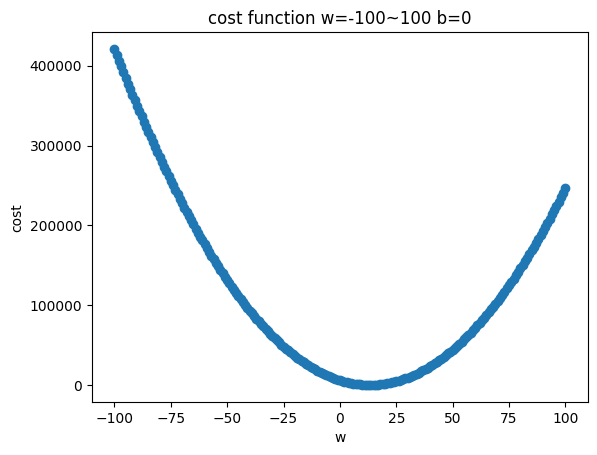

In [24]:
# b=0 w=-100 ~100 cost_function??
costs=[]
for w in range(-100,101):
  cost=compute_cost(x,y,w,0)
  costs.append(cost)

plt.scatter(range(-100,101),costs)
plt.title('cost function w=-100~100 b=0')
plt.xlabel('w')
plt.ylabel('cost')

In [25]:
# w=-100~100 b=-100~100 cost_function??
import numpy as np
ws=np.arange(-100,101)
bs=np.arange(-100,101)
costs=np.zeros((201,201))
i=0
for w in ws:
  j=0
  for b in bs:
    cost=compute_cost(x,y,w,b)
    costs[i,j]=cost
    j+=1
  i+=1
costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

when w=[9],b=[29] min_cost:32.6948484848485


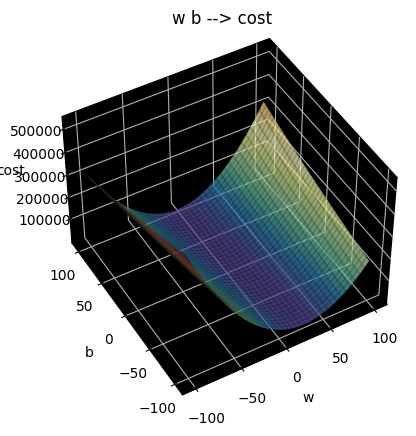

In [45]:
ax=plt.axes(projection='3d')
ax.view_init(45,-120)
ax.xaxis.set_pane_color((0,0,0))
ax.yaxis.set_pane_color((0,0,0))
ax.zaxis.set_pane_color((0,0,0))

b_grid,w_grid=np.meshgrid(bs,ws)
ax.plot_surface(w_grid,b_grid,costs,cmap='Spectral_r',alpha=0.7)
ax.plot_wireframe(w_grid,b_grid,costs,color='black',alpha=0.1)
ax.set_title('w b --> cost')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('cost')
w_index,b_index=np.where(costs==np.min(costs))
print(f'when w={ws[w_index]},b={bs[b_index]} min_cost:{np.min(costs)}')
ax.scatter